In [1]:
import torch
from torchvision import models, transforms
import numpy as np
from PIL import Image

In [ ]:
models.AlexNet()

In [ ]:
models.alexnet()

In [86]:
%time to =  torch.randn(3,11,11)
#print(t.shape)

CPU times: user 4.65 ms, sys: 39 µs, total: 4.69 ms
Wall time: 5.02 ms


In [84]:
%time nu = np.random.randn(3,11,11)

CPU times: user 56 µs, sys: 3 µs, total: 59 µs
Wall time: 62.2 µs


In [20]:
model = models.AlexNet()

In [33]:
model(t)

RuntimeError: ignored

In [24]:
t.shape

torch.Size([3, 11, 11])

In [28]:
q = torch.unsqueeze(t, dim=0)
q.shape

torch.Size([1, 3, 11, 11])

In [34]:
?torch.unsqueeze

In [35]:
?torch.flatten

In [38]:
t_flat = torch.flatten(t)
t.shape , t_flat.shape

(torch.Size([64, 3, 11, 11]), torch.Size([23232]))

In [54]:
t_c_stack = torch.column_stack(t)
t_c_stack.shape

TypeError: ignored

In [60]:
?torch.randn

In [67]:
n = torch.randn(2,2)
torch.mean(n)

tensor(0.7981)

In [72]:
%time
torch.mean(torch.randn(4))


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


tensor(0.3072)

In [2]:
img = Image.open('bobby.jpg')
img.size

(1280, 720)

In [3]:
preprocess = transforms.Compose(
    [
     transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize(
         mean = [0.485, 0.456, 0.406],
         std = [0.229, 0.224, 0.225]
     )
    ]
)

In [13]:
img_t = preprocess(img)

In [14]:
img_t.shape

torch.Size([3, 224, 224])

In [15]:
#It adds batch to the image 
batch_t = torch.unsqueeze(img_t, 0)

In [16]:
resnet = models.resnet34(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [17]:
resnet.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
out = resnet(batch_t)


In [30]:
out

tensor([[-2.5097e+00,  1.7245e+00, -4.5025e+00, -2.6730e+00, -2.3247e+00,
         -2.6463e+00, -3.9961e+00, -2.6334e+00, -1.7473e+00, -3.0405e+00,
         -1.7181e+00, -1.6843e+00, -1.8428e+00, -4.1597e+00, -2.5491e+00,
         -3.9021e+00, -3.7582e+00, -9.2134e-01, -2.8753e+00, -7.6512e-01,
         -3.4403e+00, -3.5989e+00, -4.6473e+00, -1.5161e+00, -1.8502e+00,
         -2.2092e+00, -2.7463e+00, -2.2945e+00, -1.6382e+00, -3.5421e+00,
         -4.5232e+00, -6.1500e-01, -1.4840e+00, -6.5307e-01, -1.8626e+00,
         -1.8684e+00, -1.0040e+00,  2.6880e-01, -1.1873e+00, -5.8153e-01,
          6.4028e-01, -1.4677e+00,  1.0249e+00, -1.5881e+00, -1.6629e+00,
         -1.5127e+00, -2.6725e-02, -1.1279e+00, -3.0149e+00, -2.8383e+00,
         -2.2234e-01, -2.2157e+00, -2.8692e-01, -1.9787e+00, -2.3905e+00,
         -2.4550e-01, -1.3013e+00, -4.7952e+00, -3.3656e+00,  3.0302e-01,
         -9.8936e-01,  2.7364e-01, -2.8443e-01, -2.3950e+00, -1.9995e+00,
         -1.9706e+00, -3.2674e+00, -1.

In [24]:
torch.argmax(out[0])

tensor(207)

In [25]:
#Let the label of the output
with open('imagenet_classes.txt') as f:
  labels = [line.strip() for line in f.readlines()] 

In [27]:
labels[torch.argmax(out[0])]

'golden retriever'

In [33]:
_, index = torch.max(out,1)
index[0]

tensor(207)

In [35]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
#percentage[0]*100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 90.2922134399414)

In [40]:
#Let's sort the outputs
_, indices = torch.sort(out,dim=1, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 90.2922134399414),
 ('Labrador retriever', 5.132657051086426),
 ('redbone', 1.4370511770248413),
 ('cocker spaniel, English cocker spaniel, cocker', 1.0196644067764282),
 ('beagle', 0.622511088848114)]

###Lets try predicting different images

In [ ]:
horse_img = Image.open('horse.jpg')
horse_img

In [44]:
horse_img.size

(1500, 1220)

In [45]:
horse_t = preprocess(horse_img)
horse_t.shape

torch.Size([3, 224, 224])

In [62]:
batch_horse = torch.unsqueeze(horse_t,0)
batch_horse.shape

torch.Size([3, 224, 224])

In [58]:
horse_out = resnet(batch_horse)

In [ ]:
horse_out

In [61]:
_, horse_index = torch.max(horse_out, dim=1)
horse_index

tensor([339])

In [ ]:
percntage_horse = torch.nn.functional.softmax(horse_out,dim=1)[0] * 100
percntage_horse

In [64]:
##Lets c top 5 prediction
_,out_sorted = torch.sort(out[0], descending=True)
[(labels[idx], percntage_horse[idx].item()) for idx in out_sorted[:5]]

[('sorrel', 50.8499755859375),
 ('Arabian camel, dromedary, Camelus dromedarius', 18.580211639404297),
 ('horse cart, horse-cart', 6.446576118469238),
 ('plow, plough', 5.754566669464111),
 ('cowboy boot', 2.987431764602661)]

#Let's build CycleGAN

In [65]:

import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [66]:
netG = ResNetGenerator()

In [69]:
model_path = "horse2zebra_0.4.0.pth"
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [ ]:
netG.eval()

In [71]:
gan_preprocess = transforms.Compose([
                                     transforms.Resize(256),
                                     transforms.ToTensor()
])

In [ ]:
gan_img = Image.open("horse.jpg")
gan_img

In [73]:
gan_img_t = gan_preprocess(gan_img)
batch_gan_img = torch.unsqueeze(gan_img_t, 0)

In [74]:
batch_gan_out = netG(batch_gan_img)

batch_gan_out is the output of the generator -> lets convert it into an image

In [77]:
gan_out = (batch_gan_out.squeeze() + 1.0)/2.0
out_gan_img = transforms.ToPILImage()(gan_out)

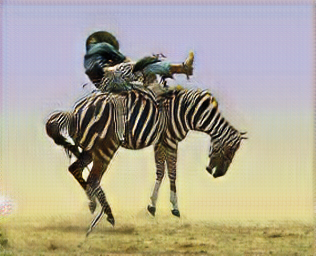

In [78]:
out_gan_img